In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas.util.testing as tm

In [5]:
data = pd.read_csv('C:/Users/mattc/Downloads/archive/housing.csv')

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
data[['median_income', 'median_house_value']]

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


In [19]:
X = data['median_income']
Y = data['median_house_value']

In [20]:
X

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [10]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

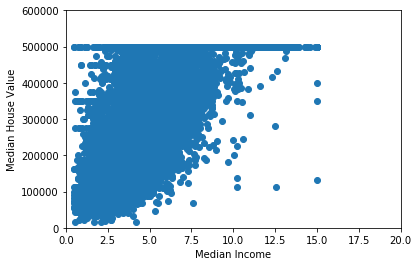

In [14]:
plt.scatter(X,Y)
plt.axis([0, 20, 0, 600000])
plt.ylabel('Median House Value')
plt.xlabel('Median Income')
plt.show()

### Ordinary Least Squares Regression

In [21]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

C:\Users\mattc\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:45:21   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082      0.000    4.25e+04    4.77e+04
median_income  4.179e+04    306.806    136.223      0.000    4.12e+04    4.24e+04
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Alpha, Beta, R^2

In [23]:
slope, intercept, r_value, p_value, std_error = stats.linregress(X, Y)

In [24]:
slope

41793.84920189628

In [25]:
intercept

45085.57670326793

In [29]:
r_value ** 2

0.47344749180719975

In [27]:
p_value

0.0

In [28]:
std_error

306.8057538867835